In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
import scipy

# Unfortunately, knn functions prompt "future warnings", the commands below turn them off
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
### Read flattened, processed MNIST data
mnist = pd.read_csv("mnist_small.csv")

## Train-test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(mnist, test_size=0.2, random_state=5)

### Separate the label column (outcome)
train_y = train['label']
train_X = train.drop(['label'], axis="columns")

### Create a binary label for 8's
train_y_binary = (train_y == 8).astype(int)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 

pipe = Pipeline([
('model', LogisticRegression(penalty='none'))
])

log_mod = pipe.fit(train_X, train_y_binary)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:

from sklearn.preprocessing import MinMaxScaler 

## Try a different solver w/ scaling
pipe = Pipeline([
('scaler', MinMaxScaler()),
('model', LogisticRegression(penalty='none', solver='newton-cg'))
])

log_mod = pipe.fit(train_X, train_y_binary)
log_mod.score(train_X, train_y_binary)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


1.0

In [16]:
from sklearn.model_selection import cross_validate
cv_res = cross_validate(log_mod, train_X, train_y_binary, cv = 5, scoring = 'accuracy')
np.average(cv_res['test_score'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


0.9220833333333334

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


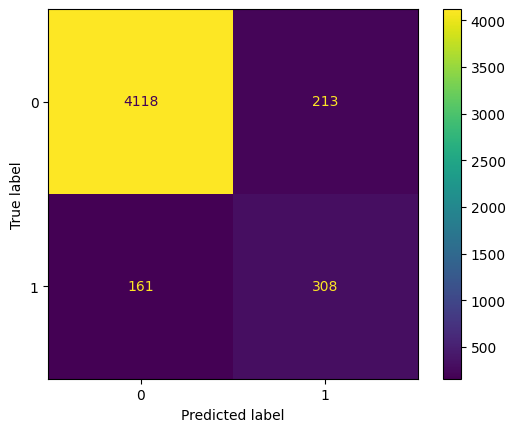

In [17]:
## Question 1a

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(log_mod, train_X, train_y_binary, cv=5)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(train_y_binary, y_pred)

In [18]:
precision = 308 / (308 + 213)
recall = 308 / (161 + 308)
f1 = 2 * precision * recall / (precision + recall)
print(f'f1 score is {f1}')

f1 score is 0.6222222222222221


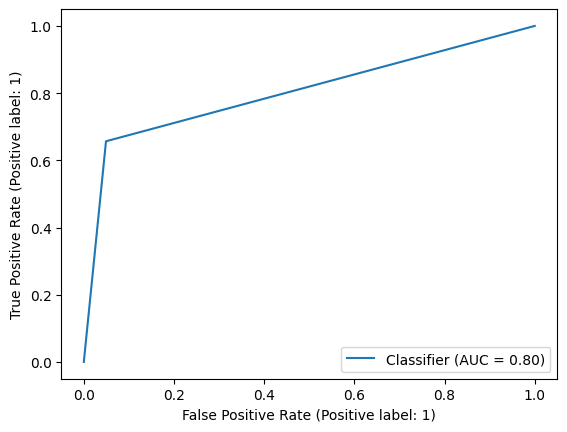

In [19]:
# Question 1b
## ROC curve plotting function:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true=train_y_binary, y_pred=y_pred, pos_label=1)

# AUC curve indicates that the model performs pretty well even if we have a class imbalance 

In [22]:
##Question 2

## Modify pipeline to fit softmax regression
pipe_lg = Pipeline([
('scaler', MinMaxScaler()),
('model', LogisticRegression(penalty='none', multi_class='multinomial'))
])
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = Pipeline([
('scaler', MinMaxScaler()),
('model', KNeighborsClassifier(n_neighbors=20, weights='distance', p=2))
])


from sklearn.metrics import make_scorer, f1_score
lg_f1 = cross_validate(pipe_lg, train_X, train_y_binary, cv = 5, scoring = make_scorer(f1_score, average='macro'))['test_score']
knn_f1 = cross_validate(pipe_knn, train_X, train_y_binary, cv = 5, scoring = make_scorer(f1_score, average='macro'))['test_score']
print(f'logistic regression f1 score: {lg_f1.mean()}')
print(f'knn f1 score: {knn_f1.mean()}')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

logistic regression f1 score: 0.8049595704940403
knn f1 score: 0.9132571923408145


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


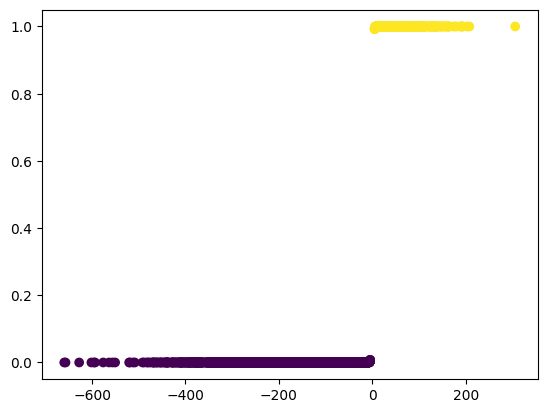

In [21]:

## Refit logistic regression
pipe = Pipeline([
('scaler', MinMaxScaler()),
('model', LogisticRegression(penalty='none', solver='newton-cg'))
])
log_mod = pipe.fit(train_X, train_y_binary)

## Store the weights and bias
w = log_mod.named_steps['model'].coef_
b = log_mod.named_steps['model'].intercept_

## Calculate eta manually using the dot product of X and w + the bias term
train_Xs =  MinMaxScaler().fit_transform(train_X)
eta = np.dot(train_Xs, np.transpose(w)) + b

## Use eta to calculate probabilities of the positive class
pi = 1/(1 + np.exp(-eta))

## Display relationship between eta and pi
plt.scatter(eta, pi, c=train_y_binary.astype('category'))
plt.show()

# Question 3

For mnist dataset, we have an perfect dichotomy of pi for different eta values. However, ic data does not have that feature, so it doesnt make sense to apply logistic regression on the dataset. As seen by the graphs for the mnist dataset, the yellow and purple points are completely distinct, and there is a very steep sigmoid curve. However, for the iowa homesales dataset, the sigmoid curve is not very steep and the yellow and purple overlap. Thus, the logistic regression is not ideal for the iowa home sales dataset.

In [26]:
## Load data
ic = pd.read_csv("IowaCityHomeSales.csv")
train_ic, test_ic = train_test_split(ic, test_size=0.2, random_state=7)

## Create X and y
train_num = train_ic.select_dtypes("number")
train_ic_y = (train_num['assessed'] > train_num['sale.amount']).astype(int)
train_ic_X = train_num.drop(['assessed','sale.amount'],axis=1)

## Fit logistic regression
pipe = Pipeline([
('scaler', MinMaxScaler()),
('model', LogisticRegression(penalty='none', solver='newton-cg'))
])
ic_log_mod = pipe.fit(train_ic_X, train_ic_y)

## Store the weights and bias
w = ic_log_mod.named_steps['model'].coef_
b = ic_log_mod.named_steps['model'].intercept_



array([[-0.31020621, -0.93361571, -1.26725492,  0.95632176, -0.28293671,
         1.09825554, -0.37688542,  0.52317614,  0.21911921, -0.06615136,
         0.07807637]])

In [32]:
train_ic_X.columns

Index(['built', 'bedrooms', 'area.base', 'area.add', 'area.bsmt',
       'area.garage1', 'area.garage2', 'area.living', 'area.lot', 'lon',
       'lat'],
      dtype='object')

In [31]:
w.shape


(1, 11)

In [38]:
np.exp(w[0][1])

0.3931296926556198

# Question 4
Suppose there is an (max-min) unit change in the predictor. There will be a 61 percent decrease in the odds. 

In [37]:
1-0.9336157147958266

0.06638428520417339

# Question 5

## Part a
Suppose x.shape = [a, b], w.shape = [b, c], then $x\cdot w$.shape = [a,c]. It calculates $\eta$, prediction scores



In [42]:
## Part b
y = 1
eta = 2.5
g = 1/(1+np.exp(-eta))
cost = y * np.log(g) + (1-y) * np.log(1-g)
print(f'cost is {cost}')

cost is -0.07888973429254952


# Part c

`random.sample(..)` returns the index of stochastic gradiennt descent. 

# Part d
1 will be multiplied by the intercept. We need one here to account for the shape difference between the weight and the predictors. 

# Part e
It will not be exactely the same. `LogisticRegression` implemetes might be different from our gradient descent method. So the final result will not likely to be exactely the same. 